<a href="https://colab.research.google.com/github/jafetpintle/DataManipulation/blob/main/Cap_3_Introduction_to_Machine_Learning_via_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 21: Preparing Data for a Linear Regression Model

##Simple Linear Regression
Simple linear regression models define the relationship between one feature and the continuous outcome variable using $$y =α + βx $$. This equation is like the slope-intercept from, where 
* *y* denotes the the predicted value of the dependent variable
* α denotes the intercept
* β that minimize the absolute diference between predicted y values

To prepare our data for a simple linear regression model, we will use a random 
subset of the Weather in Szeged 2006-2016 dataset, which consists of hourly weather 
measurements from April 1, 2006, to September 9, 2016, in Szeged, Hungary. The 
adapted data is provided as a .csv file (https://github.com/TrainingByPackt/DataScience-with-Python/blob/master/Chapter02/weather.csv) and consists of 10,000 
observations of 8 variables:
* Temperature_c: The temperature in Celsius
* Humidity: The proportion of humidity
* Wind_Speed_kmh: The wind speed in kilometers per hour
* Wind_Bearing_Degrees: The wind direction in degrees clockwise from due north
* Visibility_km: The visibility in kilometers
* Pressure_millibars: The atmospheric pressure as measured in millibars
* Rain: rain = 1, snow = 0
* Description: Warm, normal, or cold

In [1]:
#Import weather.csv dataset
import pandas as pd 
data = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter03/weather.csv?raw=true'
df= pd.read_csv(data, header=0)
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [3]:
#Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [11]:
#Checking the number of levels in Description column
#levels = len(pd.value_counts(df['Description']))
levels = len(df['Description'].unique())
print('the are {} levels in the description column'.format(levels))

the are 3 levels in the description column


In [22]:
#To dummy code all multi-class, categorical variables
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,0,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,1,0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,0,0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,0,0


Text(0.5, 1.0, 'r = -0.63')

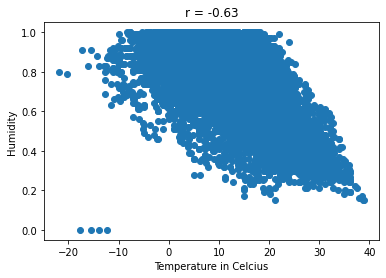

In [61]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

cor = pearsonr(df_dummies['Temperature_c'], df_dummies['Humidity'])
plt.scatter(data=df_dummies, x='Temperature_c', y = 'Humidity')
plt.xlabel('Temperature in Celcius')
plt.ylabel('Humidity')
plt.title('r = {0:0.2f}'.format(cor[0]))

To remove any possible order effects in the data, it is good practice to first shuffle 
the rows of the data prior to splitting the data into features (X) and outcome (y). To 
shuffle the rows in df_dummies, refer to the code here:

In [23]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_dummies, random_state = 42)

In [27]:
#Spliting the rows into features(x) and the dependent variable y
DV = 'Temperature_c'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

In [32]:
#Split X and y into testing and training dat.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

In [33]:
X_train.head()

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
5757,0.76,8.4525,38,14.9569,1028.63,1,1,0
7510,0.85,12.8800,150,8.0500,1021.90,0,0,0
55,0.47,8.0339,267,10.3523,1015.50,1,0,1
1983,0.28,20.8978,300,10.3684,1008.00,1,1,0
1842,1.00,6.2629,329,0.2254,1028.13,0,0,0


#Exercise 22: Fitting a Simple Linear Regression Model and Determining the  Intercept and Coefficient

Continuing from Exercise 21.

In [36]:
#Instantiate a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [37]:
#Fitting the model to the Humidity column
model.fit(X_train[['Humidity']], y_train)

LinearRegression()

In [38]:
#Extracting the value for the intercept
intercep = model.intercept_

In [42]:
#Extracting the coefficients values
coefficient = model.coef_

In [43]:
#Printing a message with the formula for predicting temperature in Celsius
print('Temperature = {0:0.2f} + ({1:0.2f}x Humidity)'.format(intercep, coefficient[0]))

Temperature = 34.50 + (-30.69x Humidity)


a day with a 0.78 humidity value has a predicted a temperature of 10.56 degrees Celsius.

# Exercise 23: Generating Predictions and Evaluating the Performance of a  Simple Linear Regression Model
Continuing from Exercise 22

In [47]:
#Generating predictions on the dest data
predictions = model.predict(X_test[['Humidity']])

A common way to evaluate model performance is to examine the correlation 
between the predicted and actual values using a scatterplot. The scatterplot 
displays the relationship between the actual and predicted values. A perfect 
regression model will display a straight, diagonal line between predicted and actual 
values. The relationship between the predicted and actual values can be quantified 
using the Pearson r correlation coefficient. 

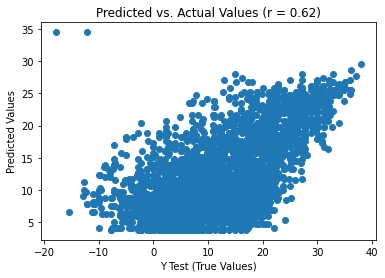

In [51]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

A model that fits the data very well will have normally distributed residuals. To 
create a density plot of the residuals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


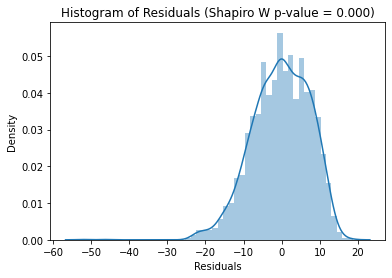

In [67]:
import seaborn as sns
from scipy.stats import shapiro
sns.distplot((y_test - predictions), bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()

The histogram shows us that the residuals are negatively skewed and the value of 
the Shapiro W p-value in the title tells us that the distribution is not normal. This 
gives us further evidence that our model has room for improvement.

Lastly, we will compute metrics for mean absolute error, mean squared error, root  mean squared error, and R-squared, and put them into a DataFrame 

In [68]:
from sklearn import metrics
import numpy as np

metrics_df = pd.DataFrame({'Metric': ['MAE','MSE', 'RMSE', 'R-Squared'],
                           'Value': [metrics.mean_absolute_error(y_test, predictions),
                                     metrics.mean_squared_error(y_test, predictions),
                                     np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                     metrics.explained_variance_score(y_test, predictions)]
                                     })
print(metrics_df)

      Metric      Value
0        MAE   6.052198
1        MSE  56.187416
2       RMSE   7.495827
3  R-Squared   0.389288


* **Mean absolute error (MAE)**: is the average absolute difference between the predicted values and the actual values.
* **Mean squared error (MSE)**: is the average of the squared differences between the predicted and actual values.
* **Root mean squared error (RMSE)**:is the square root of the MSE.
* **R-squared** tells us the proportion of variance in the dependent variable that can be explained by the model. 

Thus, in this simple linear 
regression model, humidity explained only 38.9% of the variance in temperature. 
Additionally, our predictions were within ± 6.052 degrees Celsius.